In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/budget-speech-2020/budget_speech.docx
/kaggle/input/budget-speech-2021/budget2021.txt
/kaggle/input/budget-txt/budget_speech.txt


In [2]:
#Importing Some Packages
import string
from string import punctuation
import nltk
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.tokenize import wordpunct_tokenize
from nltk.stem import PorterStemmer , SnowballStemmer
stemmer_s = SnowballStemmer('english')
from string import punctuation
stop_nltk=stopwords.words("english")
from nltk.tokenize import TweetTokenizer
tw=TweetTokenizer()
from nltk.stem import WordNetLemmatizer
lemm = WordNetLemmatizer()
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer

/opt/conda/lib/python3.6/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [3]:
data=pd.read_csv('/kaggle/input/budget-speech-2021/budget2021.txt',error_bad_lines=False, warn_bad_lines=False)

In [4]:
txt = " ".join(data['CONTENTS'].values)

In [5]:
txt[:40]

'PART-A \t\tPage No. •\tIntroduction\t1 •\tHea'

## Raw Wordcloud

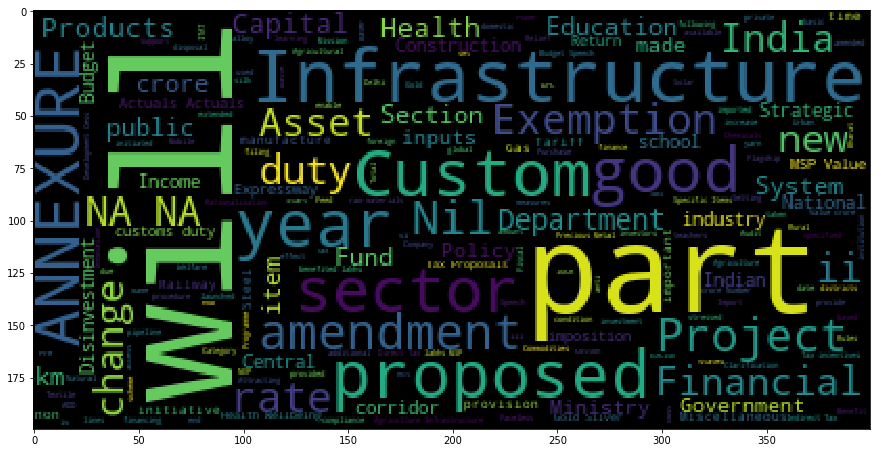

In [6]:
wordcloud = WordCloud().generate(txt)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.show()

Here we can observe words spoken most are coming in bigger font and we have some words like part,will and others which have to be removed as we know the data is about budget and there words are gonna br common.

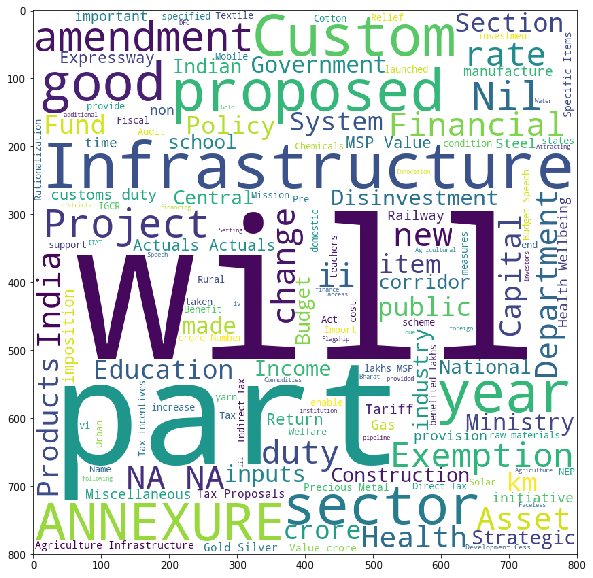

In [7]:
# A little Beautification.
word_cloud = WordCloud(width=800,height=800,background_color='white',
                      max_words=150).generate(txt)
plt.figure(figsize=(15,10))
plt.imshow(word_cloud)
plt.show()

In [8]:
#Getting words and its frequency in dict-key-values.
y = {} 
for i in txt.split(' '): 
    y[i] = y.get(i,0)+1
#conversion:
freq = {'words':list(y.keys()) , 'freq':list(y.values())}

mydata=pd.DataFrame(freq)
mydata.sort_values(by='freq',ascending=False).head()

,words,freq
64,of,172
5,and,115
39,the,89
84,,87
29,to,83


Here we can see some "STOPWORDS" and space coming most times which has to be removed.

## Step-1/ Tokenizing

In [9]:
#Applying tokenizer
text=word_tokenize(txt.lower()) # Converting all words to lower case for Uniform Casing.
print(len(txt),len(text))

25430 4419


After tokenizating we are left with 6119 words.

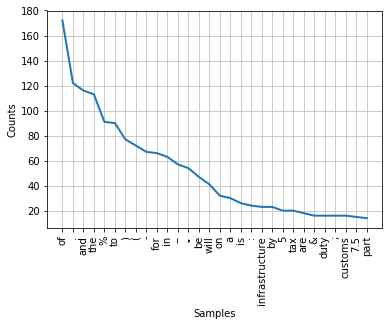

In [10]:
fdist = FreqDist(text)
fdist.plot(30,cumulative=False)
plt.show()

Still we have punctuations and ofcourse STOPWORDS which we will remove now.

## Step-2/Removing StopWords

In [13]:
from string import punctuation
stop_nltk=stopwords.words("english")
upd_stop = stop_nltk + ['part','department','government','proposed','under','centeral','will','ministry','provide','rate'] 
txt_upd = [term for term in text if term not in upd_stop and \
               term not in list(punctuation) and len(term)>2]
len(set(txt_upd))

1321

## Step-3/Lemmatization

In [14]:
newtxt=[lemm.lemmatize(word) for word in txt_upd]

## Final WordCloud

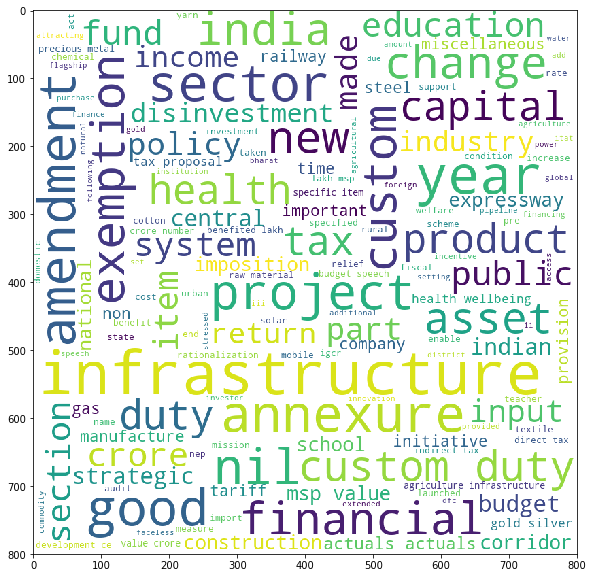

In [15]:
#New WordCloud
mytxt=" ".join(newtxt)
#Initiating WordCloud
word_cloud = WordCloud().generate(mytxt)
#Beautifying
word_cloud = WordCloud(width=800,height=800,background_color='white',
                      max_words=150).generate(mytxt)
plt.figure(figsize=(15,10))
plt.imshow(word_cloud)
plt.show()

- From this we can infer that 
    - good word is used - which is a positive sentiment
    - infrastructure is been talked about the most
    - ecemption word is used as we know that after this budget people above 75 has been exempted from filling income tax return.
    - alse projets and educations can be seen as one of mostly used word as different schemes are being launched in education sector.
    

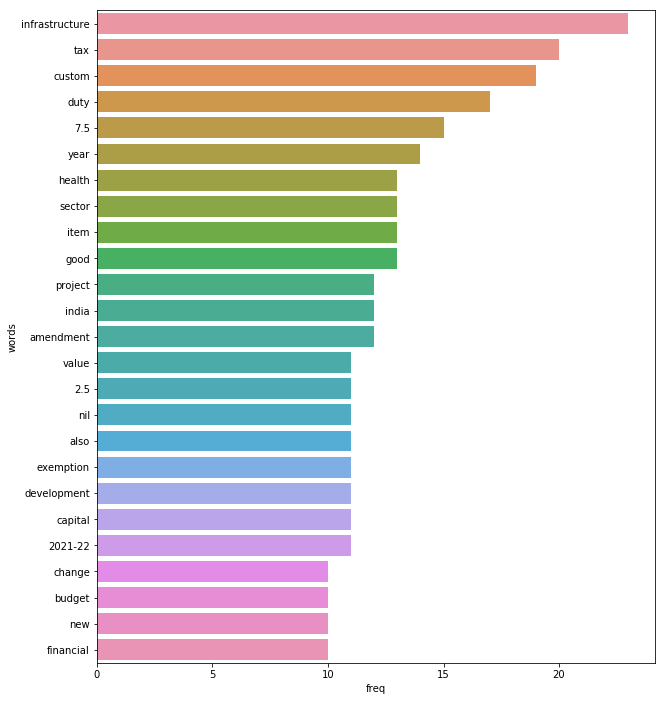

In [16]:
#Barplot
fdist = FreqDist(newtxt)
freq = {'words':list(fdist.keys()) , 'freq':list(fdist.values())}
df=pd.DataFrame(freq)
dat=df.sort_values(by='freq',ascending=False).head(25)
plt.figure(figsize=(10,12))
sns.barplot(data=dat,x='freq',y='words')
plt.show()

## Getting Bigrams for better inference

In [17]:
count_vect = CountVectorizer()
X = count_vect.fit_transform(newtxt)
#Getting the BOW:-
count_vect.get_feature_names()
#Getting the DataFrame
DTM = pd.DataFrame(X.toarray(),columns=count_vect.get_feature_names()) #datatermmatrix
# TDM=term document matrix
TDM = DTM.T
TDM.head()

,0,1,2,3,4,5,6,7,8,9,...,2336,2337,2338,2339,2340,2341,2342,2343,2344,2345
00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
02,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
03,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
#Bigrams
count_vect_bg = CountVectorizer(ngram_range=(2,2),max_features=25)
X_bg = count_vect_bg.fit_transform(newtxt)
DTM_bg = pd.DataFrame(X_bg.toarray(),columns=count_vect_bg.get_feature_names())
DTM_bg.drop(columns=['2021 22','2018 19','2017 18','5000 00','2021 22','2020 21','2019 20','10000 00','2016 17'],inplace=True)#Dont need date columns so dropping them.

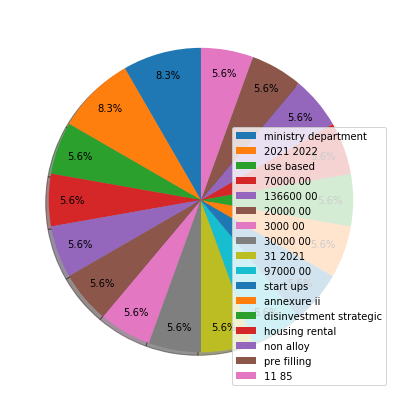

In [22]:
plt.figure(figsize=(10,7))
x=DTM_bg.sum().sort_values(ascending=False).head(25)
y=x.reset_index()
y.head(1)
plt.pie(y[0],autopct='%1.1f%%', startangle=90, pctdistance=0.85,shadow=True)
plt.legend(y['index'],loc='lower right')
plt.show()

- From the above pie chart we cant get much inference as numeric characters are coming
- Still we get some words like 'disinvestment strategy' and 'housing rental'.

## Getting Sentiment-score of the speech.

In [23]:
analyser = SentimentIntensityAnalyzer()
def get_vader_sentiment(sent):
    return analyser.polarity_scores(sent)['compound']
print(get_vader_sentiment(mytxt))

0.9998


We get a positive .99 score which denotes a overall positive vibe throughout the speech.

## Clustering and analysis major topics of the budget.

In [24]:
tfidf_vect =TfidfVectorizer()
X=tfidf_vect.fit_transform(newtxt)
X.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [25]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4,random_state=0)
y_means = kmeans.fit_predict(X.toarray())

In [26]:
BOW=tfidf_vect.get_feature_names()
num_clusters = 4
arr=kmeans.cluster_centers_
ordered_clu = arr.argsort()[:,::-1]
for i in range(num_clusters):
    print('Topics :',i)
    for i in ordered_clu[i,:5]:
        print(BOW[i])

Topics : 0
00
infrastructure
tax
duty
2021
Topics : 1
item
infrastructure
00
amendment
crore
Topics : 2
custom
00
infrastructure
item
health
Topics : 3
year
infrastructure
amendment
crore
custom


Infrastructure is being stressed most during the speech as it comes in every topic.
- Top 4 topics and top 5 terms in respective topics being used in the budget 2021.

If you find it interesting please do upvote.
- Thank You